# Try-this Exercises

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from itertools import product

## Problem 1: 

Design an experiment to investigate the use of the F statistic to discern differences in variances.

### Answer:

Below I have plotted the F statistic of 2 samples of various sample sizes as a function of the ratio between the variances of populations the samples draw from (which I have named "population F"). Each F statistic is the mean of 100 samples and calculations from those samples, and error shown is just the standard deviation of those calculations.

We see that when there is more separation in population variances/scales, there is more uncertainty in the calculated F statistic compared to the true value (the population F). This is true for all sample sizes. However, as expected, when we use larger sample sizes, we see that the true population F statistic is captured better by the samples.

Interesting to note, at least in this plot, the low sample size F statistics almost consistently showed a higher mean value than the true poplulation ratio.

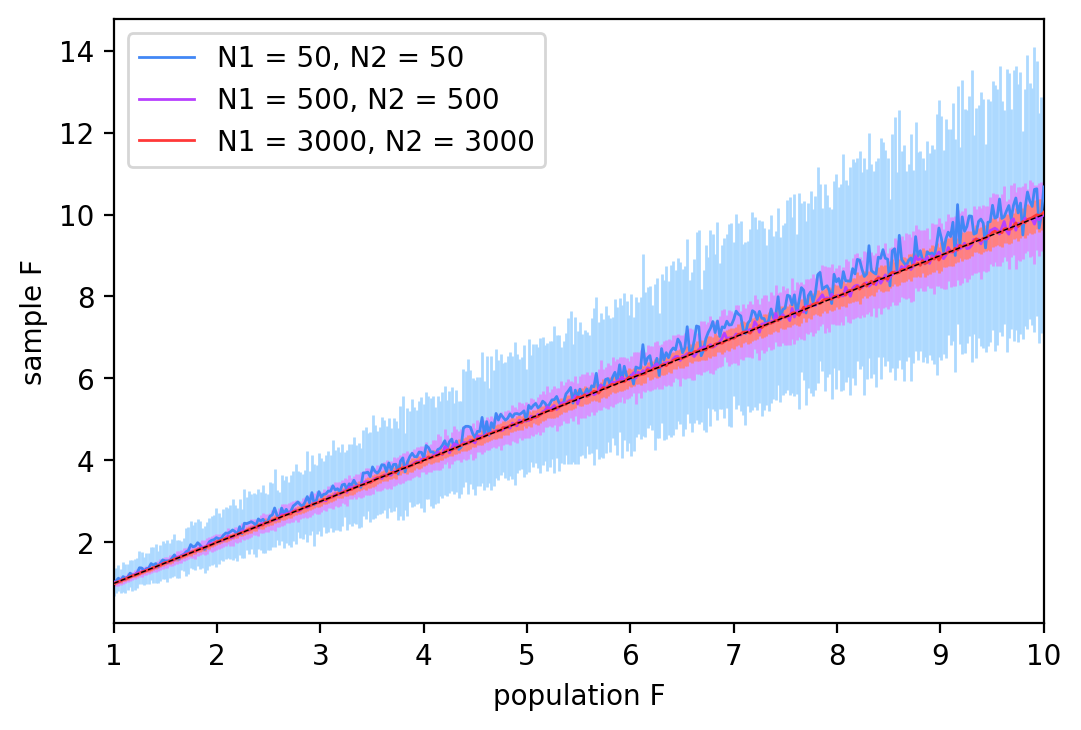

In [2]:
mu_p1, sig_p1 = 0, 1
mu_p2 = 0

def get_F(F, N1, N2, n_tests=100):
    sig_p2 = sig_p1 / np.sqrt(F)
    sample1 = np.random.normal(mu_p1, sig_p1, size=(n_tests, N1))
    sample2 = np.random.normal(mu_p2, sig_p2, size=(n_tests, N2))
    
    var1 = np.var(sample1, axis=1)
    var2 = np.var(sample2, axis=1)
    
    F = var1 / var2

    return F.mean(), F.std()

N1 = [50, 500, 3000]
N2 = [50, 500, 3000]
F_range = 1, 10
pop_F = np.linspace(*F_range, 400)

fig, ax = plt.subplots(dpi=200)

color = [
    ('#4287f5', '#add9ff'),
    ('#b840ff', '#d794ff'),
    ('#ff3838', '#ff8080')
]

count = 0
for n1, n2 in zip(N1, N2):
    samp_F = np.array([get_F(pop_f, n1, n2) for pop_f in pop_F])
    ax.plot(pop_F, samp_F[:, 0], '-', label=f'N1 = {n1}, N2 = {n2}',
            c=color[count][0], lw=1, zorder=count + len(N1))
    ax.errorbar(pop_F, samp_F[:, 0], yerr=samp_F[:, 1],
                c=color[count][1], elinewidth=1, zorder=count)
    count += 1
    
line = np.linspace(*F_range, 2)
ax.plot(line, line, '--', c='k', lw=0.5, zorder=20)
    
ax.set_xlim(F_range)
ax.set_xlabel('population F')
ax.set_ylabel('sample F')

ax.legend(loc='upper left')

plt.show()

## Problem 2:  

Find the two data sets flux_densities_galaxies.dat and flux_densities_random.dat in the lecture8 module page.  The first data set gives the flux densities (in some odd units) measured in a region where there is an over-density of galaxies, and the second gives the flux densities in random regions of the sky.  The claim is that there is an excess of flux density in the regions where there are galaxies.  

- Make a cumulative distribution plot for the two distributions.  Do you see much of a difference?
- Use the Wilcoxon-Mann-Whitney U test, the KS test, and the Anderson-Darling test to investigate the claim that there is an excess of flux at the location of the galaxies.

Discuss. What do you conclude?

### Answer:

Below I've plotted the two cumulative distributions. Other than the minimum and maximum values, there is not much difference in the distributions themselves.

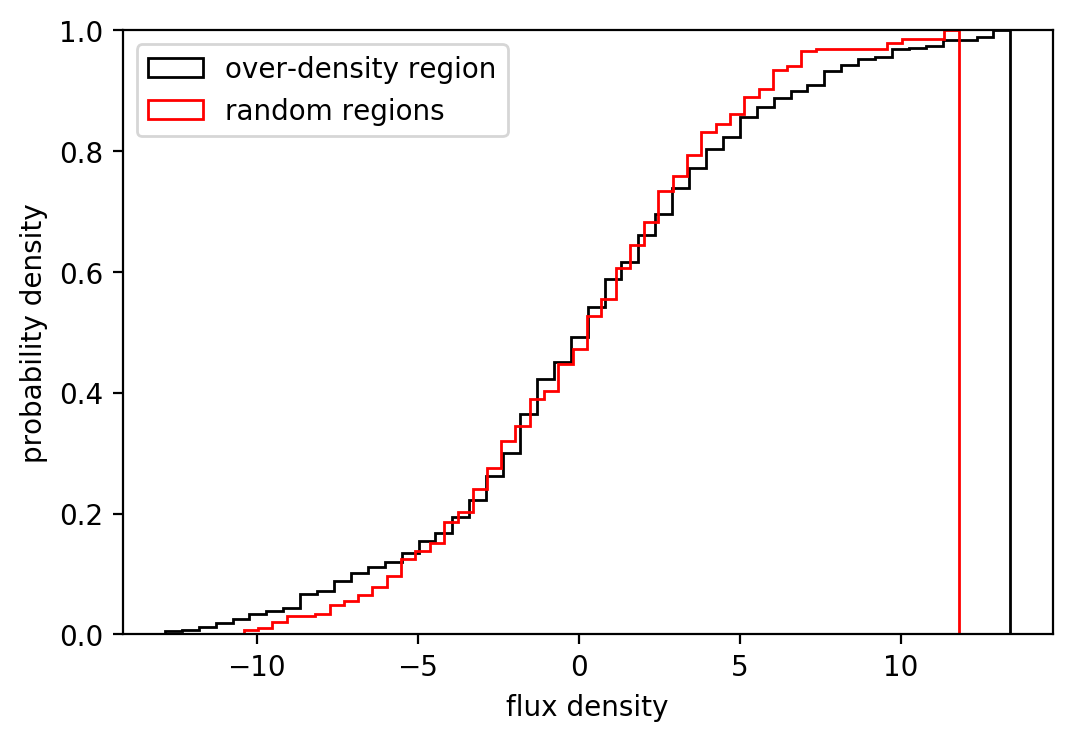

In [3]:
fd_galaxies = np.loadtxt('flux_densities_galaxies.dat')
fd_random = np.loadtxt('flux_densities_random.dat')

fig, ax = plt.subplots(dpi=200)

ax.hist(fd_galaxies, bins=50, cumulative=True, density=True,
        histtype='step', color='k', label='over-density region')
ax.hist(fd_random, bins=50, cumulative=True, density=True,
        histtype='step', color='r', label='random regions')

ax.set_xlabel('flux density')
ax.set_ylabel('probability density')
ax.set_ylim(0, 1)

ax.legend(loc='upper left')

plt.show()

According to all three tests below, the p-values associated all suggest that we cannot reject the null hypothesis with significance level $\alpha = 0.05$. Therefore, we still cannot conclude that these samples came from different distributions, and thus we cannot say there is an excess of flux in the expected over-density region.

In [4]:
# Wilcoxon-Mann-Whitney
U, pU = ss.mannwhitneyu(fd_galaxies, fd_random)
print(f'MWW U test: {U} with p-value {pU}')

# KS
D, pD = ss.ks_2samp(fd_galaxies, fd_random)
print(f'KS test: {D} with p-value {pD}')

# Anderson-Darling
A, cA, pA = ss.anderson_ksamp([fd_galaxies, fd_random])
print(f'A-D test: {A} with significance level {pA}')

MWW U test: 55112.5 with p-value 0.36654288292310444
KS test: 0.06741111309630159 with p-value 0.4159511900220736
A-D test: 0.16463588015261296 with significance level 0.25


<ipython-input-4-bf7448b33024>:10: UserWarning: p-value capped: true value larger than 0.25
  A, cA, pA = ss.anderson_ksamp([fd_galaxies, fd_random])
